# Gaussiane a 2 dimensioni


Il modo più semplice per ottenere una PDF per due variabili è fare il prodotto di due PDF, una per ciascuna variabile. L'esempio più semplice è con due Gaussiane, che assumiamo per semplicità abbiamo valor medio nullo. Per motivi che saranno più chiari in seguito, chiamiamo le due variabili $x^\prime$ e $y^\prime$:

$\displaystyle g_{x^\prime y^\prime}(x^\prime, y^\prime) = g_{x^\prime}(x^\prime) g_{y^\prime}(y^\prime) = 
\frac{1}{2\pi\sigma_{x^\prime}\sigma_{y^\prime}}
\exp\left[-\frac{1}{2}\left( \frac{x^{\prime 2}}{\sigma^2_{x^\prime}}+\frac{y^{\prime 2}}{\sigma^2_{y^\prime}}\right)\right]
$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib import cm

In [2]:
sx, sy = 2, 1
def g2d(x, y):
    return norm.pdf(x, scale=sx)*norm.pdf(y, scale=sy)
x, y = np.meshgrid(np.linspace(-4, 4, 101), np.linspace(-4, 4, 101))
z = g2d(x, y)

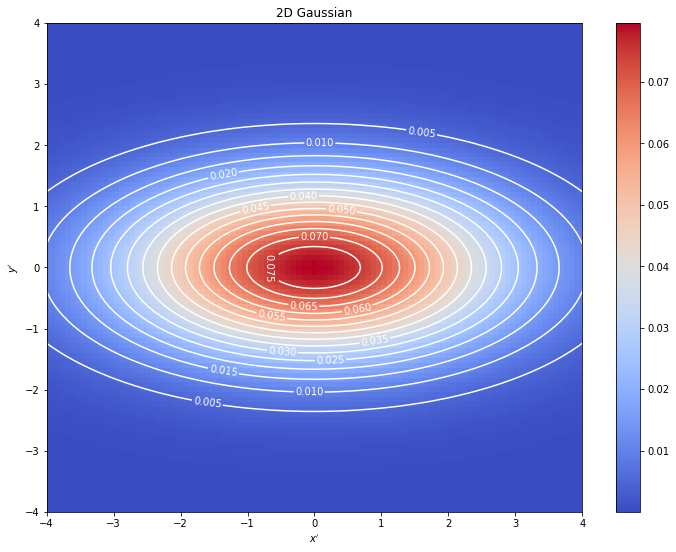

In [3]:
figure, ax = plt.subplots(figsize=(12,9))
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, vmin=z.min(), vmax=z.max(), shading='auto')
con = ax.contour(x, y, z, np.arange(0, 0.09, 0.005), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D Gaussian')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('$x^\prime$')
ax.set_ylabel('$y^\prime$')
figure.colorbar(col)
plt.show()

Consideriamo una matrice di rotazione corrispondente ad un angolo $\phi$:

$\displaystyle R(\phi) = \left(\begin{array}{cc}\cos\phi & -\sin\phi \\ \sin\phi & \cos\phi\end{array}\right)$

$\displaystyle \left(\begin{array}{c}x^\prime\\y^\prime\end{array}\right) = 
R(\phi)
\left(\begin{array}{c}x\\y\end{array}\right) = 
\left(\begin{array}{cc}\cos\phi & -\sin\phi \\ \sin\phi & \cos\phi\end{array}\right)
\left(\begin{array}{c}x\\y\end{array}\right) =
\left(\begin{array}{c}x\cos\phi -y\sin\phi\\x\sin\phi +y\cos\phi\end{array}\right)
$ 

Noi applicheremo la matrice *inversa* $R^{-1}(\phi) = R(-\phi)$ perché vogliamo passare da $(x^\prime, y^\prime)$ a $(x, y)$.
Basterà quindi cambiare segno a $\phi$.

In [4]:
import math
phi = -math.pi/6
s, c = math.sin(phi), math.cos(phi)
rot = np.array([[c, -s], [s, c]])

In [6]:
rot

array([[ 0.8660254,  0.5      ],
       [-0.5      ,  0.8660254]])

In [13]:
v = [0.9, 0.1]
np.matmul(rot, v)

array([ 0.82942286, -0.36339746])

In [15]:
def g2dr(x, y):
    return g2d(*np.matmul(rot, [x, y]))

In [16]:
z = (np.vectorize(g2dr))(x, y)

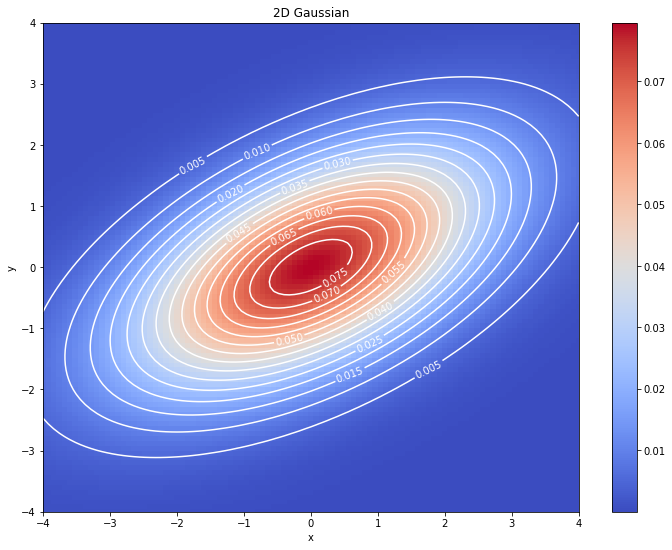

In [17]:
figure, ax = plt.subplots(figsize=(12,9))
col = ax.pcolormesh(x, y, z, cmap=cm.coolwarm, vmin=z.min(), vmax=z.max(),shading='auto')
con = ax.contour(x, y, z, np.arange(0, 0.09, 0.005), colors='white')
ax.clabel(con, inline=1, fontsize=10)
ax.set_title('2D Gaussian')
ax.axis([x.min(), x.max(), y.min(), y.max()])
ax.set_xlabel('x')
ax.set_ylabel('y')
figure.colorbar(col)
plt.show()

## Da variabili indipendenti a variabili correlate
La matematica per passare dalle coordinate $(x^\prime, y^\prime)$ nelle quali la distribuzione si fattorizza nel 
prodotto di due gaussiane ($x^\prime$ e $y^\prime$ sono variabili indipendenti) ad $(x,y)$ è un po' tediosa.

Nel seguito i passaggi salienti.

La PDF in termini di $x^\prime$ e $y^\prime$, come abbiamo definito sopra, è:

$\displaystyle g_{x^\prime y^\prime}(x^\prime, y^\prime) = g_{x^\prime}(x^\prime) g_{y^\prime}(y^\prime) = 
\frac{1}{2\pi\sigma_{x^\prime}\sigma_{y^\prime}}
\exp\left[-\frac{1}{2}\left( \frac{x^{\prime 2}}{\sigma^2_{x^\prime}}+\frac{y^{\prime 2}}{\sigma^2_{y^\prime}}\right)\right]
$


La trasformazione di coordinate è data dalla seguente rotazione:

$\begin{cases}
\ x'=x\cos\phi-y\sin\phi\\
\ y'=x\sin\phi+y\cos\phi
\end{cases}$

La PDF trasformata si ottiene tenendo conto che il determinante jacobiano è unitario: $\mathrm{det}|\partial x^\prime_i/\partial x_j|=1$. La rotazione, infatti, conserva le aree.

La PDF trasformata deve essere della seguente forma:

$\displaystyle g_{xy}(x,\
y)=\frac{1}{2\pi\,|C|^{\frac{1}{2}}}\exp\left[-\frac{1}{2}(x,\,y)\,C^{-1}\,\left(\begin{array}{l}
x\\
y
\end{array}\right)\right]\ 
$

Uguagliando gli argomenti dell'esponenziale si ottiene la seguente equazione:

$\displaystyle\frac{x^{\prime 2}}{\sigma_{x'}^{2}}+\frac{y^{\prime
2}}{\sigma_{y'}^{2}}= (x,\,y)\,C^{-1}\ \left(\begin{array}{l}
x\\
y
\end{array}\right)$

Esplicitando la trasforlazione di coordinate

$\begin{align}&\displaystyle\frac{x^{\prime 2}}{\sigma_{x'}^{2}}+\frac{y^{\prime
2}}{\sigma_{y'}^{2}}= 
\frac{(x\cos\phi-y\sin\phi)^2}{\sigma_{x'}^{2}}+
\frac{(x\sin\phi+y\cos\phi)^2}{\sigma_{y'}^{2}} = \\
& = \frac{x^2\cos^2\phi-2yx\sin\phi\cos\phi+y^2\sin^2\phi}{\sigma_{x'}^{2}}+
\frac{x^2\cos^2\phi+2yx\sin\phi\cos\phi+y^2\sin^2\phi}{\sigma_{y'}^{2}} = \\
& = \left(\frac{\cos^2\phi}{\sigma_{x'}^{2}}+\frac{\sin^2\phi}{\sigma_{y'}^{2}}\right)x^2 +
\left(\frac{\sin^2\phi}{\sigma_{x'}^{2}}+\frac{\cos^2\phi}{\sigma_{y'}^{2}}\right)y^2 +
2\sin\phi\cos\phi\left(\frac{1}{\sigma_{y'}^{2}}-\frac{1}{\sigma_{x'}^{2}}\right)xy
\end{align}
$

La matrice $C^{-1}$ è quindi:

$  C^{-1}=\left(\begin{array}{l@{\quad}l}\displaystyle\frac{\cos^{2}\phi}{\sigma^2_{x'}}
+ \frac{\sin^{2}\phi}{\sigma^2_{y'}} & \displaystyle\sin\phi\cos\phi
\left(\frac{1}{\sigma_{y^{\prime}}^2} - \frac{1}{\sigma^2_{x'}}\right)\\
\displaystyle\sin\phi\cos\phi\left(\frac{1}{\sigma_{y^{\prime}}^2} -
\frac{1}{\sigma^2_{x'}}\right) & \displaystyle\frac{\sin^2\phi}{\sigma^2_{x'}} +
\frac{\cos^2\phi}{\sigma^2_{y'}}\end{array}\right)$

La matrice di covarianza deve avere la seguente forma:

$C= \left(\begin{array}{l@{\quad}l}
\sigma_{x}^{2} & \rho_{xy}\,\sigma_{x}\sigma_{y}\\
\rho_{xy}\,\sigma_{x}\sigma_{y} & \sigma_{y}^{2}\end{array}\right)$

Si può dimostrare che, per una gaussiana, $C_{ij}=\mathbb{C}\mathrm{ov}[x_i, x_j]$.

Questo permette di ottenere il valore del determinante al denominatore della PDF che deve essere:

$\boxed{\displaystyle\left|C^{-1}\right|=\frac{1}{\sigma_{x'}^{2}\sigma_{y'}^{2}}=\frac{1}{\sigma_{x}^{2}\sigma_{y}^{2}\left(1-\rho_{xy}^{2}\right)}}$

Esplicitando, infatti:

$\begin{align}\left|C^{-1}\right| & =
\left(\frac{\cos^{2}\phi}{\sigma^2_{x'}}
+ \frac{\sin^{2}\phi}{\sigma^2_{y'}} \right)\left(\frac{\sin^2\phi}{\sigma^2_{x'}} +
\frac{\cos^2\phi}{\sigma^2_{y'}}\right)-
\sin^2\phi\cos^2\phi\left(\frac{1}{\sigma_{y^{\prime}}^2} - \frac{1}{\sigma^2_{x'}}\right)^2
= \\
& = \sin^{2}\phi\cos^{2}\phi\left(\frac{1}{\sigma^4_{x'}}+\frac{1}{\sigma^4_{y'}}\right) +
\left(\sin^4\phi+\cos^4\phi\right)\frac{1}{\sigma^2_{x'}\sigma^2_{y'}}-
\sin^2\phi\cos^2\phi\left(\frac{1}{\sigma_{y^{\prime}}^2} - \frac{1}{\sigma^2_{x'}}\right)^2
= \\
& = 2\sin^{2}\phi\cos^{2}\phi\frac{1}{\sigma^2_{x'}\sigma^2_{y'}}+\left(\sin^4\phi+\cos^4\phi\right)\frac{1}{\sigma^4_{x'}\sigma^4_{y'}} = \\
& = \frac{\sin^4\phi+2\sin^{2}\phi\cos^{2}+\cos^4\phi}{\sigma^2_{x'}\sigma^2_{y'}} = \frac{1}{\sigma_{x'}^{2}\sigma_{y'}^{2}}
\end{align} 
$

come volevasi dimostrare.

L'inversione di $C^{-1}$ dà quindi:

$C=\left(\begin{array}{ll}
\cos^{2}\phi\,\sigma_{x'}^{2}+\sin^{2}\phi\,\sigma_{y'}^{2} &\ \sin\phi\cos\phi\,\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)\\
\sin\phi\cos\phi\,\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)&\ \sin^{2}\phi\,\sigma_{x'}^{2}+\cos^{2}\phi\,\sigma_{y'}^{2}
\end{array}\right)$

Da $C$ si possono ottenere i diversi termini:

$\begin{align}
\sigma_{x}^{2}&= \cos^{2}\phi\,\sigma_{x'}^{2} +\sin^{2}\phi\,\sigma_{y'}^{2} \\
\sigma_{y}^{2}&=\sin^{2}\phi\,\sigma_{x'}^{2} +\cos^{2}\phi\,\sigma_{y'}^{2}
\end{align}
$

Si può notare che:

$\begin{align}
\sigma_{y}^{2} -\sigma_{x}^{2}&= \sin^{2}\phi\,\sigma_{x'}^{2} +\cos^{2}\phi\,\sigma_{y'}^{2}-\cos^{2}\phi\,\sigma_{x'}^{2} -\sin^{2}\phi\,\sigma_{y'}^{2} = \\
& = (\sin^{2}\phi-\cos^2\phi)\,\sigma_{x'}^{2} - (\sin^{2}\phi-\cos^2\phi)\,\sigma_{y'}^{2} = \\
& = (\sin^{2}\phi-\cos^2\phi)(\sigma_{x'}^{2} - \sigma_{y'}^{2}) = \cos 2\phi\,(\sigma_{y'}^{2} - \sigma_{x'}^{2})
\end{align} 
$

$
\begin{align}
\rho_{xy}&=\frac{\mathbb{C}\mathrm{ov}(x,y)}{\sigma_{x}\sigma_{y}}=
\frac{\sin\phi\cos\phi\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)}{\sigma_{x}\sigma_{y}}=
\frac{\sin 2\phi\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)}{2\sqrt{\left(\cos^{2}\phi\,\sigma_{x'}^{2}+\sin^{2}\phi\,\sigma_{y'}^{2}\right)\left(\sin^{2}\phi\,\sigma_{x'}^{2}+\cos^{2}\phi\,\sigma_{y'}^{2}\right)}}
\end{align}
$

Considerando che:

$\sin 2\phi = 2\sin\phi\cos\phi \ \ \implies\ \ \ \sin^2 2\phi = 4\sin^2\phi\cos^2\phi$

$
\sin^4\phi+\cos^4\phi = (\sin^2\phi+\cos^2\phi)^2-2\sin^2\phi\cos^2\phi = 1 -\frac{1}{2}\sin^2 2\phi
$

$\begin{align}
\rho_{xy}&= \frac{\sin 2\phi\,\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)}{2\sqrt{
\sin^{2}\phi\cos^{2}\phi\,\left(\sigma_{x'}^{4}+\sigma_{y'}^{4}\right)+
(\sin^{4}\phi+\cos^{4}\phi)\,\sigma_{x'}^{2}\sigma_{y'}^{2}
}} = \\
&= \frac{\sin 2\phi\,\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)}{2\sqrt{
\frac{1}{4}\sin^{2}2\phi\left(\sigma_{x'}^{4}+\sigma_{y'}^{4}\right)+
\left(1-\frac{1}{2}\sin^{2}2\phi\right)\,\sigma_{x'}^{2}\sigma_{y'}^{2}
}} = \frac{\sin 2\phi\,\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)}{\sqrt{
\sin^{2}2\phi\left(\sigma_{x'}^{4}+\sigma_{y'}^{4}\right)+
\left(4-2\sin^{2}2\phi\right)\,\sigma_{x'}^{2}\sigma_{y'}^{2}
}} = \\
&= \frac{\sin 2\phi\,\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)}{\sqrt{
\sin^{2}2\phi\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)^2+
4\sigma_{x'}^{2}\sigma_{y'}^{2}
}}\\
\end{align}
$

In forma matriciale:

$\left(\begin{array}{c}
\sigma_x^2 \\
\sigma_y^2
\end{array}
\right) =
\left(
\begin{array}{cc}
\cos^2\phi & \sin^2\phi \\
\sin^2\phi & \cos^2\phi
\end{array}
\right)
\left(\begin{array}{c}
\sigma_x^{\prime 2} \\
\sigma_y^{\prime 2}
\end{array}
\right)
$

Invertendo:

$\displaystyle\left(\begin{array}{c}
\sigma_x^{\prime 2} \\
\sigma_y^{\prime 2}
\end{array}
\right) =
\left(
\begin{array}{cc}
\cos^2\phi & \sin^2\phi \\
\sin^2\phi & \cos^2\phi
\end{array}
\right)^{-1}
\left(\begin{array}{c}
\sigma_x^2 \\
\sigma_y^2
\end{array}
\right) =\frac{1}{\cos^2\phi-\sin^2\phi}
\left(
\begin{array}{cc}
\cos^2\phi & -\sin^2\phi \\
-\sin^2\phi & \cos^2\phi
\end{array}
\right)
\left(\begin{array}{c}
\sigma_x^2 \\
\sigma_y^2
\end{array}
\right) =\frac{1}{\cos 2\phi}
\left(
\begin{array}{cc}
\cos^2\phi & -\sin^2\phi \\
-\sin^2\phi & \cos^2\phi
\end{array}
\right)
\left(\begin{array}{c}
\sigma_x^2 \\
\sigma_y^2
\end{array}
\right)
$

In particolare:

$\begin{align}
\sigma_{x'}^{2}+\sigma_{y'}^{2} &  = \frac{\left(\cos^2\phi\,\sigma_x^2 - \sin^2\phi\,\sigma_y^2\right) + \left(-\sin^2\phi\,\sigma_x^2 + \cos^2\phi\,\sigma_y^2\,\right)}{\cos 2\phi} = \frac{(\cos^2\phi+\sin^2\phi)\,\left(\sigma_x^2-\sigma_y^2\right)}{\cos 2\phi} =
\sigma_x^2+\sigma_y^2
\end{align}
$

Questo esprime l'invarianza dell'area dell'ellisse.

Possiamo quindi riscrivere $\rho_{xy}$ come:

$\begin{align}
\rho_{xy}=\frac{\sin 2\phi\left(\sigma_{y'}^{2}-\sigma_{x'}^{2}\right)}{2\sigma_{x}\sigma_{y}}=
\frac{\tan 2\phi\left(\sigma_{y}^{2}-\sigma_{x}^{2}\right)}{2\sigma_{x}\sigma_{y}}
\end{align}
$


In particolare, da questo di rotazione $\phi$ soddisfa questa relazione:

$\displaystyle\boxed{\tan2\phi=\frac{2\,\rho_{xy}\,\sigma_{x}\sigma_{y}}{\sigma_{y}^{2}-\sigma_{x}^{2}}}$

Finalmente, la PDF trasformata si può scrivere:

$\displaystyle\boxed{g_{xy}(x,\,y) = \frac{1}{2\pi\,\sigma_x\sigma_y\sqrt{1 -
\rho^2_{xy}}}\exp \left[-\frac{1}{2(1 - \rho^2_{xy})}
\left(\frac{x^2}{\sigma^2_x} + \frac{y^2}{\sigma^2_y} -
\frac{2x\,y\,\rho_{xy}}{\sigma_x\sigma_y}\right)\right]}$

# Contorni a $1\sigma$, $2\sigma$, $n\sigma$

La curva che corrisponde all'argomento dell'esponenziale pari ad 1 è una curva equiprobabile:

$\displaystyle\frac{x^{2}}{\sigma_{x}^{2}}+\frac{y^{2}}{\sigma_{y}^{2}}-\frac{2x\,y\,\rho_{xy}}{\sigma_{x}\sigma_{y}}=1$

Esistono relazioni tra le deviazioni standard di $x$, $y$, $x^\prime$ e $y^\prime$ che possono essere sintetizzate nella figura seguente:

<img style="width: 500px" src="img/gauss_2d.png">

Similmente si possono definire i contorni a $2\sigma$:

$\displaystyle\frac{x^{2}}{\sigma_{x}^{2}}+\frac{y^{2}}{\sigma_{y}^{2}}-\frac{2x\,y\,\rho_{xy}}{\sigma_{x}\sigma_{y}}=2^2 = 4\ .
$

Le PDF marginali si possono calcolare integrando $g_{xy}(x,y)$, e si ottengono gaussiane ad una dimensione:

$\begin{align}
g_{x}(x)&=\int_{-\infty}^{+\infty}\!\!\! g_{xy}(x,\,y)\
\mathrm{d}y=\frac{1}{\sqrt{2\pi\,\sigma_{x}^{2}}}\,e^{-{x^{2}}/{2\sigma_{x}^{2}}}
\\
g_{y}(y)&=\int_{-\infty}^{+\infty}\!\!\! g_{xy}(x,\,y)\
\mathrm{d}x=\frac{1}{\sqrt{2\pi\,\sigma_{y}^{2}}}\,e^{-{y^2}/{2\sigma_{y}^{2}}}
\end{align}
$

<img style="width: 600px" src="img/gauss_2d_contours.png">


## Probabilità degli ellissoidi a $n\sigma$

Si può calcolare analiticamente la probabilità corrispondente ad un ellissiode in due dimensioni di ampiezza $1\sigma$, $2\sigma$, $3\sigma$, ecc.

In particolare, qualunque sia la matrice di correlazione, si possono ruotare le variabili in modo da annullare la correlazione, quindi applicare un fattore di scala in modo da ottenere deviazione standard pari ad uno per entrambe le variabili. In questo modo, l'ellissoide corrisponde ad un cerchio di raggio $1$, $2$, $3$, ecc.

L'integrale diventa:

$\displaystyle P_{\mathrm{2D}}(Z\sigma) = \int_0^Ze^{-r^2/2}r\,\mathrm{d}r = 1 - e^{-Z^2/2}$

In [18]:
for z in [1, 2, 3]:
    p_1D = norm.cdf(z)-norm.cdf(-z)
    p_2D = 1 - math.exp(-z**2/2)
    print('{:.2f}σ - 1D: {:.5f}; 2D: {:.5f}'.format(z, p_1D, p_2D))

1.00σ - 1D: 0.68269; 2D: 0.39347
2.00σ - 1D: 0.95450; 2D: 0.86466
3.00σ - 1D: 0.99730; 2D: 0.98889


In generale, quando si mostrano grafici in 2D con ellissoidi indicati con $1\sigma$, $2\sigma$, $3\sigma$, ecc., si intende che il loro contenuto di probabilità **non** sia 68.3%, 95.5%, 99.7% ecc., ma che siano invece queste le probabilità corrispondenti a ciascuna delle **proiezioni** 1D. 

## Numeri casuali gaussiani con correlazione

Nella documentazione di ```matplotlib``` viene spiegato <a href="https://matplotlib.org/3.1.1/gallery/units/ellipse_with_units.html">come disegnare un ellisse</a>. Questo viene applicato su 
 <a href="https://matplotlib.org/3.1.1/gallery/statistics/confidence_ellipse.html#sphx-glr-gallery-statistics-confidence-ellipse-py">come disegnare un contorno di confidenza</a>, ma lo vedremo successivamente. 

In [19]:
from scipy.stats import norm
from matplotlib import patches

In [20]:
sigma_x1, sigma_y1 = 1, 3
x1 = norm.rvs(scale=sigma_x1, size=10000)
y1 = norm.rvs(scale=sigma_y1, size=10000)
phi_deg = 30
phi = phi_deg/180*math.pi
s, c = math.sin(phi), math.cos(phi)
x = c*x1 - s*y1
y = s*x1 + c*y1

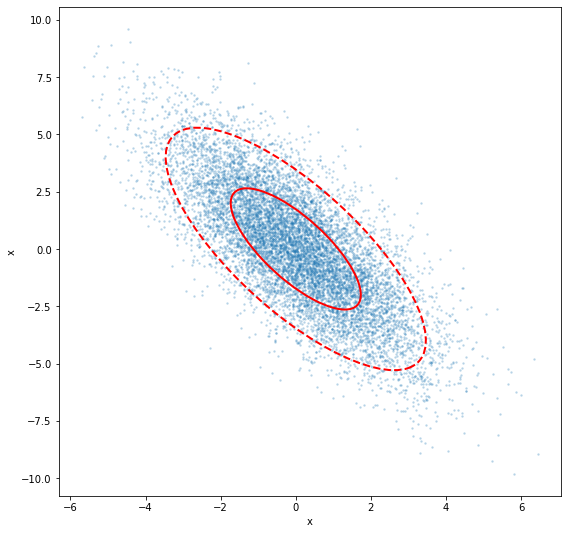

In [21]:
fig = plt.figure(figsize=(9,9))
plt.scatter(x,y, marker='.', s=10, alpha=0.2)
ax = plt.gca()
e1 = patches.Ellipse((0, 0), 2*sigma_x1, 2*sigma_y1, angle=phi_deg, linewidth=2, color='r', fill=False, zorder=3)
e2 = patches.Ellipse((0, 0), 4*sigma_x1, 4*sigma_y1, angle=phi_deg, linewidth=2, color='r', linestyle='--', fill=False, zorder=3)
ax.add_patch(e1)
ax.add_patch(e2)
ax.set_xlabel('x')
ax.set_ylabel('x')
fig.show()

## Disegnamo le proiezioni nelle due dimensioni

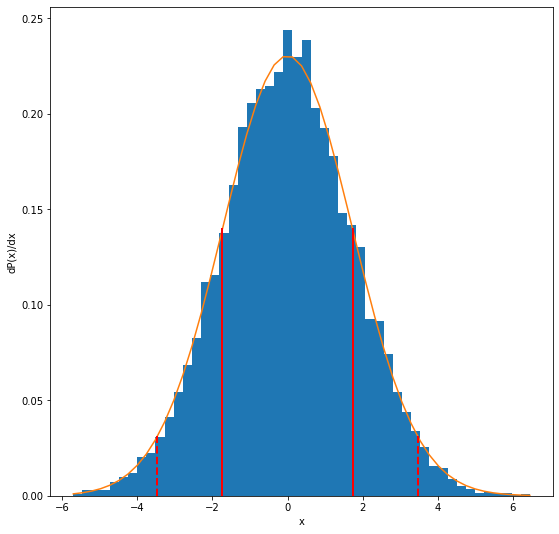

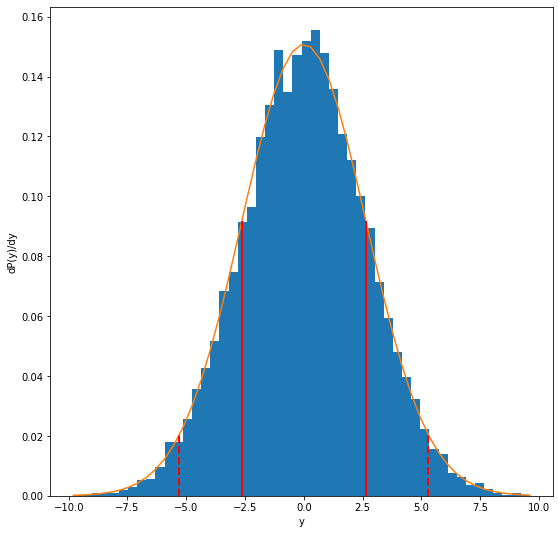

In [22]:
sigma_x = math.sqrt((c*sigma_x1)**2+(s*sigma_y1)**2)
sigma_y = math.sqrt((s*sigma_x1)**2+(c*sigma_y1)**2)
fig = plt.figure(figsize=(9,9))
n, bins, p = plt.hist(x,50, density=True)
plt.plot(bins, norm.pdf(bins,scale=sigma_x))
plt.plot([sigma_x, sigma_x], [0, norm.pdf(sigma_x,scale=sigma_x)], color='r',linewidth=2)
plt.plot([-sigma_x, -sigma_x], [0, norm.pdf(sigma_x,scale=sigma_x)], color='r',linewidth=2)
plt.plot([2*sigma_x, 2*sigma_x], [0, norm.pdf(2*sigma_x,scale=sigma_x)], color='r',linewidth=2, linestyle="--")
plt.plot([-2*sigma_x, -2*sigma_x], [0, norm.pdf(2*sigma_x,scale=sigma_x)], color='r',linewidth=2, linestyle="--")
plt.xlabel('x')
plt.ylabel('dP(x)/dx')
fig.show()
fig = plt.figure(figsize=(9,9))
n, bins, p = plt.hist(y,50, density=True)
plt.plot(bins, norm.pdf(bins,scale=sigma_y))
plt.plot([sigma_y, sigma_y], [0, norm.pdf(sigma_y,scale=sigma_y)], color='r',linewidth=2)
plt.plot([-sigma_y, -sigma_y], [0, norm.pdf(sigma_y,scale=sigma_y)], color='r',linewidth=2)
plt.plot([2*sigma_y, 2*sigma_y], [0, norm.pdf(2*sigma_y,scale=sigma_y)], color='r',linewidth=2, linestyle="--")
plt.plot([-2*sigma_y, -2*sigma_y], [0, norm.pdf(2*sigma_y,scale=sigma_y)], color='r',linewidth=2, linestyle="--")
plt.xlabel('y')
plt.ylabel('dP(y)/dy')
fig.show()

# Disegnamo le proiezioni allineate con i due assi

Consultare per dettagli la <a href="https://matplotlib.org/stable/tutorials/intermediate/gridspec.html">documentazione su ```GridSpec```</a>.

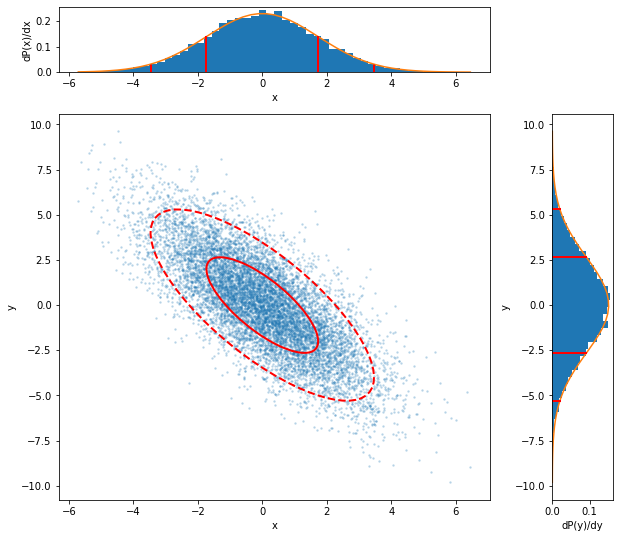

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(10, 12)
ax0 = plt.subplot(gs[6:10, 5:9])
axx = plt.subplot(gs[5:6, 5:9])
axy = plt.subplot(gs[6:10, 9:10])
ax0.scatter(x,y, marker='.', s=10, alpha=0.2)
ee1 = patches.Ellipse((0, 0), 2*sigma_x1, 2*sigma_y1, angle=phi_deg, linewidth=2, color='r', fill=False, zorder=3)
ee2 = patches.Ellipse((0, 0), 4*sigma_x1, 4*sigma_y1, angle=phi_deg, linewidth=2, color='r', linestyle='--', fill=False, zorder=3)
ax0.add_patch(ee1)
ax0.add_patch(ee2)
nx, binsx, px = axx.hist(x,50, density=True)
axx.plot(binsx, norm.pdf(binsx,scale=sigma_x))
axx.plot([sigma_x, sigma_x], [0, norm.pdf(sigma_x,scale=sigma_x)], color='r',linewidth=2)
axx.plot([-sigma_x, -sigma_x], [0, norm.pdf(sigma_x,scale=sigma_x)], color='r',linewidth=2)
axx.plot([2*sigma_x, 2*sigma_x], [0, norm.pdf(2*sigma_x,scale=sigma_x)], color='r',linewidth=2, linestyle='--')
axx.plot([-2*sigma_x, -2*sigma_x], [0, norm.pdf(2*sigma_x,scale=sigma_x)], color='r',linewidth=2, linestyle='--')
ny, binsy, py = axy.hist(y,50, density=True, orientation='horizontal')
axy.plot(norm.pdf(binsy,scale=sigma_y), binsy)
axy.plot([0, norm.pdf(sigma_y,scale=sigma_y)], [sigma_y, sigma_y], color='r',linewidth=2)
axy.plot([0, norm.pdf(sigma_y,scale=sigma_y)], [-sigma_y, -sigma_y], color='r',linewidth=2)
axy.plot([0, norm.pdf(2*sigma_y,scale=sigma_y)], [2*sigma_y, 2*sigma_y], color='r',linewidth=2)
axy.plot([0, norm.pdf(2*sigma_y,scale=sigma_y)], [-2*sigma_y, -2*sigma_y], color='r',linewidth=2)
ax0.set_xlabel('x')
ax0.set_ylabel('y')
axx.set_xlabel('x')
axx.set_ylabel('dP(x)/dx')
axy.set_ylabel('y')
axy.set_xlabel('dP(y)/dy')
fig.tight_layout()
plt.show()

# Generalizzazione a $N$ dimensioni

la generalizzazione ad $N$ dimensioni è la seguente:

$\displaystyle g(x_i,\cdots,x_N) = \frac{1}{(2\pi)^{N/2}\left|C\right|^{-1/2}}\exp\left[
-\frac{1}{2}(x_i-\mu_i)\,C_{ij}^{-1}\,(x_j-\mu_j)
\right]$

dove $C$ è la matrice di correlazione $N\times N$:

$C_{ij} = \mathbb{C}\mathrm{ov}(x_i, x_j)$

# Spunti per esercizi
* generare coppie di numeri distribuiti in maniera gaussiana con la matrice di covarianza voluta usando [```multivariate_normal```](https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html) e verificare numericamente che la matrice sia quella voluta.